<b> Here, we will plot word frequencies </b>

In [21]:
# first we import a bunch of stuff
import requests
import re
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

To be able to plot word frequencies, we need text, I will we taking text from a book on https://www.gutenberg.org/, I will be using the adventures of sherlock holmes

In [22]:
url = "https://www.gutenberg.org/files/1661/1661-0.txt"
sherlock = requests.get(url)
print(sherlock.text)


Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue C

In [23]:
print(sherlock.text.split())

['Project', "Gutenberg's", 'The', 'Adventures', 'of', 'Sherlock', 'Holmes,', 'by', 'Arthur', 'Conan', 'Doyle', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.net', 'Title:', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'Author:', 'Arthur', 'Conan', 'Doyle', 'Release', 'Date:', 'November', '29,', '2002', '[EBook', '#1661]', 'Last', 'Updated:', 'May', '20,', '2019', 'Language:', 'English', 'Character', 'set', 'encoding:', 'UTF-8', '***', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'THE', 'ADVENTURES', 'OF', 'SHERLOCK', 'HOLMES', '***', 'Produced', 'by', 'an', 'anonymous', 'Project', 'Gutenberg', 'volunteer', 'and', 'Jose', 'Menendez', 'cover', 'The', 

Our goal currently, is to find the 10 most occurring words. For this we will use the Freqdist class. Say abs is an instance of the class Freqdist, then abs.most_common(n) will give a list of the ten most common words, paired up with their frequencies

In [24]:
def plot_word_frequency(word_list, number = 10):
    word_freq = FreqDist(word_list)
    words = [element[0] for element in word_freq.most_common(number)]
    frequencies = [element[1] for element in word_freq.most_common(number)]
    plot = sns.barplot(words,frequencies)
    return plot

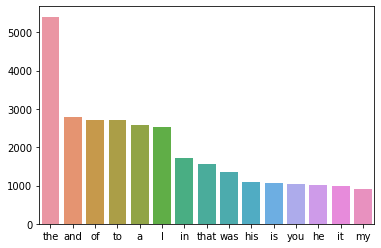

In [25]:
plot_word_frequency(sherlock.text.split(), 15)

In any large text sample (that actually makes sense and has meaning), there are words that occur a few times, words that occur very less, and words that occur a decent number of times. In general, the words taht occur alot are words like a, is, the, and they tell us nothing about what the given text sample is about. That is why we must remove these. That is what we will do now.

In [26]:
# to do that, we first get a list of these commn words, we get the list like this
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
# we will give an example now
string = 'To be or not to be? I will add a word that will remain.'
string = string.lower() # makes everything lower
string = re.sub('[^\w\s]','',string) #\w is all alpha numeric characters, and \s is stuff like \n and \t, 
# here we take its inverse (which basically consists of all other symbols) and we remove them
string_list = string.split()
print(string_list)

['to', 'be', 'or', 'not', 'to', 'be', 'i', 'will', 'add', 'a', 'word', 'that', 'will', 'remain']


In [31]:
final_list = [word for word in string_list if word not in stopwords.words('english')]

In [32]:
print(final_list)

['add', 'word', 'remain']


Now we do this for the book

In [34]:
sherlock_text = sherlock.text
sherlock_text = sherlock_text.lower()
sherlock_text = re.sub('[^\w\s]','',sherlock_text)
sherlock_list = sherlock_text.split()

In [36]:
final_list = [word for word in sherlock_list if word not in stopwords.words('english')]

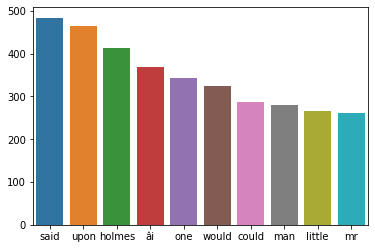

In [38]:
plot_word_frequency(final_list, 10)

idk how to make this better to be honest